## Descent-gradient algorithm implementation following:
    Batch method
    On-line method
### And using different loss functions:<br>
    L2 error
    Mean Square Error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def changment(loss_function, weights, label, features):
    if loss_function == "quadratic":
        factor = -2*(label - weights.T.dot(features))
        return factor*features 
    elif loss_function == "l1":
        pass

In [ ]:
def sum_changment(loss_function, weights, all_labels, all_features):
    if loss_function in {"quadratic", "MSE"}:
        delta = np.zeros(weights.shape)
        for i in range(len(all_labels)):
            delta += changment("quadratic", weights, all_labels[i], all_features[i])
        #print(f"Delta is {delta}")
    return delta if loss_function == "quadratic" else delta/len(all_labels)

In [ ]:

def descent_gradient(loss_function:str, labels:np.array, record_features:np.array, nepochs:int, learning_rate:float, method="batch" or "on-line"):
    size = len(labels)

    init_shape = record_features.shape

    nweights = 1 if len(init_shape) == 1 else init_shape[1]
    weights = np.random.rand(nweights+1)

    # Adding the feature 1 for the bias node
    bias_feature = np.ones(size)

    cpy_record_features = record_features.reshape((size, 1)) if nweights == 1 else record_features
    cpy_record_features = np.hstack((cpy_record_features, bias_feature.reshape((size, 1))))
    #print(cpy_record_features, cpy_record_features[0])

    if method == "on-line":
        for _ in range(nepochs):
            for i in range(size):
                weights = weights - learning_rate*changment(loss_function, weights, labels[i], cpy_record_features[i])
    
    elif method == "batch":
        for _ in range(nepochs):
            weights = weights - learning_rate*sum_changment(loss_function, weights, labels, cpy_record_features)

    return weights

In [ ]:
loss_function = "quadratic"
nepochs = 10000
learning_rate = 0.01
labels = np.array([3.5, 5.2, 4.5, 5.3, 6.5, 4.1])
features_X= np.array([0.1, 0.2, 0.3, 0.3, 0.5, 0.4])

In [ ]:
w = descent_gradient(loss_function, labels, features_X, nepochs, learning_rate, "batch")


In [ ]:
plt.plot(features_X, labels, 'ro', label="Original data")
z = np.linspace(0, 0.6, 100)
plt.plot(z, w[0]*z+w[-1], 'b', label="Original data")
plt.show()

In [ ]:
multdm_features = np.array([
    [0.5, 3],
    [0.4, 3],
    [0.4, 4],
    [2.3, 5],
    [2.1, 5],
    [2.2, 4.5]
])

_w_ = descent_gradient("quadratic", labels, multdm_features, 10000, 0.001, "batch")
print(_w_)


In [ ]:
plt.plot(multdm_features[:, 0], multdm_features[:, 1], 'ro', label="Original data")
plt.show()

In [ ]:
labels = np.array([1, 1,  1, -1, -1, -1])

def perceptron(cpy_multdm_features, labels, nepochs, learning_rate):

    init_shape = cpy_multdm_features.shape
    nweights = 1 if len(init_shape) == 1 else init_shape[1] -1
    weights = np.random.rand(nweights+1)
    

    for _ in range(nepochs):
        misclassified = 0
        delta = 0
        for i in range(len(labels)):
            cost = labels[i]*weights.T.dot(cpy_multdm_features[i])
            if cost <= 0:
                misclassified += 1
                delta += labels[i]*cpy_multdm_features[i]
        weights = weights + learning_rate*delta
    return weights

cpy_multdm_features = np.hstack((multdm_features, np.ones(len(labels)).reshape((-1, 1))))
final = perceptron(multdm_features, labels, 100, 0.1)
#print(final)
posCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == 1])
negCategorie = np.array([(multdm_features[:, 0][i], multdm_features[:, 1][i]) for i in range(len(labels)) if labels[i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-final[0]*z-final[-1])/final[1]
plt.plot(z, separator_equation, 'b')
plt.show()

In [ ]:
import pandas as pd
iris_data = pd.read_csv("C:/Users/Junior/Documents/3A/AI/TDs/iris_a.txt", header=None)
feature_array = np.array(iris_data)
size = len(feature_array)

In [ ]:

posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 1][i]) for i in range(size) if feature_array[:, -1][i] == -1])
e = plt.figure(0)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
e.show()


posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

f = plt.figure(1)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
f.show()

g = plt.figure(2)
posCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 0][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
g.show()

h = plt.figure(3)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 2][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
h.show()

i = plt.figure(4)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
i.show()

j = plt.figure(5)
posCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == 1])
negCategorie = np.array([(feature_array[:, 1][i], feature_array[:, 3][i]) for i in range(size) if feature_array[:, -1][i] == -1])

plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')
j.show()

## Training of a Perceptron model on iris dataset

In [ ]:
#print(feature_array[:, 0:2], feature_array[:, -1])

np.random.shuffle(feature_array)
#print(feature_array)
labels = feature_array[:, -1]
cpy_multdm_features = np.hstack((feature_array[:, 0:2], np.ones(len(labels)).reshape((-1, 1))))

In [ ]:

"""
#------------------------------------------------------------#
Splitting data in train set and test set
"""
#print(cpy_multdm_features[0:5,:])

fifty = len(labels)//2
train_set = cpy_multdm_features[0:fifty, :]
train_y = labels[0:fifty]

test_set = cpy_multdm_features[fifty: , :]
test_y = labels[fifty:]



#------------------------------------------------------------#
#Training the perceptron

iris_weights = perceptron(train_set, train_y, nepochs, learning_rate)

print(iris_weights)
posCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == 1])
negCategorie = np.array([(feature_array[0:fifty, 0][i], feature_array[0:fifty, 1][i]) for i in range(len(train_y)) if feature_array[0:fifty, -1][i] == -1])

#print(posCategorie)
#print(negCategorie)
plt.plot(posCategorie[:, 0], posCategorie[:, 1], '+')
plt.plot(negCategorie[:, 0], negCategorie[:, 1], 'o')

z = np.linspace(0, 10, 10)
separator_equation = (-iris_weights[0]*z-iris_weights[-1])/iris_weights[1]
plt.plot(z, separator_equation, 'b')
plt.show()




In [87]:
#------------------------------------------------------------#
#Testing the perceptron

def predict(weights:np.array, test_set, test_y, metric="accuracy"):
    size = len(test_y)
    predictions = []

    for i in range(size):
        prediction = weights.dot(test_set[i, :])
        predictions.append(prediction)
    
    return compute_metric(predictions, test_y, "LogisticRegression", metric)


def compute_metric(predictions, labels, usage="LogisticRegression", metric="accuracy", error_function="percept"):
    #---------------------------------------------------------------
    # Colors code to display metrics
    #---------------------------------------------------------------
    red = "\n\033[31m"
    green = "\n\033[32m"
    yellow = "\n\033[33m"
    blue = "\n\033[34m"
    magenta = "\n\033[35m"
    cyan = "\n\033[36m"
    reset = "\033[0m\n"

    if usage in ['LogisticRegression', 'MultiClassification']:
        size = len(labels)
        
        good_prediction= lambda prediction, label, error_function: prediction*label >=0 if error_function == "percept" else prediction==label if error_function == "simple" else 5
        match metric:
            case "accuracy" | "acc":
                accuracy = 100*sum(good_prediction(predictions[i],labels[i],error_function) for i in range(size)) / size
                print(f" {red if accuracy < 50 else green}Your model accuracy is  {accuracy}% on this dataset {reset} ")
                return accuracy, predictions
                

            case "confusion_matrix" | "conf-mat" | "recall" | "precision" | "f1"| "au_roc":
                true_negatives, true_positives, false_negatives, false_positives = 0,0,0,0
            
                true_negatives = sum(predictions[i] < 0 and  good_prediction(predictions[i], test_y[i],error_function) for i in range(size))
                true_positives = sum(predictions[i] > 0 and  good_prediction(predictions[i], test_y[i],error_function) for i in range(size))
                false_negatives = sum(predictions[i] < 0 and not good_prediction(predictions[i], test_y[i],error_function) for i in range(size))
                false_positives = sum(predictions[i] > 0 and not good_prediction(predictions[i], test_y[i],error_function) for i in range(size))

                if metric in ["confusion_matrix","conf-mat"]:
                    print(f" {blue}TP: {true_positives} -- TN: {true_negatives} -- FP: {false_positives} -- FN: {false_negatives} {reset} ")
                    return np.array([true_positives, true_negatives, false_positives, false_negatives]), predictions
                
                if metric in ["recall",  "f1"]:
                    recall = true_positives/(true_positives+false_positives)
                    if metric == "recall":
                        print(f"{red if recall < 0.50 else green} Recall: {recall} {reset}")
                        return recall, predictions
                
                if metric in ["precision", "f1"]:
                    precision = true_positives/(true_positives+false_negatives)
                    if metric == "precision":
                        print(f" {red if precision < 50 else green} Precision: {precision} {reset}")
                        return precision, predictions
                
                if metric == "f1":
                    f1_score = 2 / ((1/precision)+(1/recall))
                    print(f"{blue} f1 score: {f1_score} {reset} ")
                    return f1_score, predictions
                
                if metric == "au_roc":
                    tpr = true_positives/(true_positives+false_negatives)
                    fpr =  false_positives/(false_positives+true_negatives)
                    au_roc = tpr/fpr
                    print(f"{cyan} auc surface: {au_roc} {reset}")
                    return au_roc, predictions

    else:
        predictions = np.array(predictions)
        labels = np.array(labels)
        match metric:
            case "MSE":
                mse = np.mean((predictions-labels))**2
                print(f"{cyan} Mean Square Error is: {mse}{reset} ")
                return mse
            case "MSA":
                msa = np.mean((predictions-labels))
                print(f"{cyan}Mean Average Error is {msa}{reset}")
                return msa


a,b =predict(iris_weights, test_set, test_y, "conf-mat")
print(b)

 
TP: 22 -- TN: 27 -- FP: 0 -- FN: 1 
 
[-10.665376629013952, 2.5007215068260873, -4.542451766392654, 1.980453861623703, -9.624841338609183, -7.770654141670358, -1.5548231507296018, -2.6217636919928786, 1.8337617309578695, 3.7280445544991405, 4.248312199701521, -5.809870440668144, 2.754010141555316, 1.0866107018847695, -4.62264301959754, -7.8508453948752415, 0.7531308139506587, 0.41965092601654796, -4.42216488658533, -3.688704233256159, -3.2887234678611, -4.729239523660928, -4.875931654326765, -2.3547846815197193, 3.768140181101577, -4.582547392995096, 2.16724161889198, 2.7276048906968082, -5.249507168863314, -3.688704233256159, 3.167681282694309, -3.808991113063483, -5.4763905527340295, -1.8482074120612688, 4.248312199701521, 1.4601862164213186, 2.460625880223647, -1.5010371483832274, 1.0866107018847695, 5.369038743311178, 2.2738381229553752, -5.582987056797425, 3.8346410585625286, 5.4756352473745675, -4.435855262329261, -5.329698422068198, 1.273398459153045, -3.808991113063483, -5.39

# Backpropagation

In [ ]:
import random
import math

class Dense():
    # -------------------------------------------------------------------#
    # Fully connected layer
    # -------------------------------------------------------------------#
    def __init__(self, nodes_count:int, activation_function = "reLu", is_output=False, categories=[]) -> None:
        # For the moment input should be like (x, )
        # a node is an array that contains 5 values: 
        # an id --
        # x::input data-- 
        # dE/dx:: derivative of error per x -- 
        # y:: output data = result of activation function f(x) -- 
        # dE/dy:: derivative of error per y
        # input_nodes:: the nodes of the previous layer that are connected to this node
        # CONVENTION the last node of a layer is the bias node
        self.activation = activation_function
        self.size = nodes_count +1 if not is_output else nodes_count
        self.is_output = is_output
        categories = categories[:nodes_count] if len(categories) >= nodes_count else categories
        self.nodes = [
            {'id':0, 
            'label':f'{categories[i]}' if i < len(categories) else '', 
            'x':0.0, 
            'dE/dx':0.0, 
            'y':0.0, 
            'dE/dy':0.0, 
            'input_nodes':[], 
            'output_nodes':[]
            } 
        for i in range(self.size)]
        
    def activate(self):
        match self.activation:
            case "identity":
                return lambda x: x
            case "reLu": 
                return lambda x: x if x > 0 else 0
            case "sigmoid":
                return lambda x: math.exp(x) / (1 + math.exp(x))
            
    def derivate(self):
         match self.activation:
            case "identity":
                return lambda _: 1
            case "reLu":
                 return lambda x: 0 if x <= 0 else 1
            case "sigmoid":
                return lambda x: (self.activate()(x)) * (1-(self.activate()(x)))


In [98]:
class NetModel:
    def __init__(self, input_shape, usage="LinearRegression") -> None:
        #-------------------------------------------------------------------
        # For the moment, I manage 1D input data
        #-------------------------------------------------------------------
        self.input_shape = input_shape
        self.layers_stack = []
        self.weights = []
        self.type = usage if usage in ['LinearRegression', 'LogisticRegression', 'MultiClassification'] else 'LinearRegression'
        self.total_nodes = 0
        self.losses = []
        self.logistic_real_classes = []
        # Add input layer
        self.add_layer(Dense(self.input_shape[0], "identity"))
        
    
    def add_layer(self,layer: Dense):
        self.layers_stack.append(layer)
        
    
    def compile(self, n_nodes=1, activation_function="reLu", categories=[]):
        """
        n_nodes:: Output layer nodes number; >1 for multiclassification

        """
        if self.type == 'LogisticRegression':
            activation_function = "sigmoid"
        #-------------------------------------------------------------------
        # First, add the output layer
        #-------------------------------------------------------------------
        if self.type == 'MultiClassification':
            assert len(categories) >= 2 
            self.add_layer(Dense(n_nodes, activation_function, is_output=True, categories=categories))
        else:
            self.add_layer(Dense(1, activation_function, is_output=True))


        layers_count = len(self.layers_stack)
        self.total_nodes = sum(self.layers_stack[i].size for i in range(layers_count)) 
        
        #-------------------------------------------------------------------
        # set nodes id
        #-------------------------------------------------------------------
        count_nodes = 0
        for i in range(layers_count):
            layer = self.layers_stack[i]
            for k in range(layer.size):
                layer.nodes[k]['id'] = count_nodes + k
            count_nodes += layer.size

        #-------------------------------------------------------------------
        # add input_nodes
        # Pay attention not to add input_nodes to bias node
        # bias node is considered the last node of a layer
        #-------------------------------------------------------------------
        for i in range(1, layers_count):
            layer = self.layers_stack[i]
            back_layer = self.layers_stack[i-1]
            back_nodes = [back_layer.nodes[a] for a in range(back_layer.size)]
            right_range = range(layer.size -1) if i < layers_count-1 else range(layer.size)
            for k in right_range:
                layer.nodes[k]['input_nodes'] = back_nodes

        #-------------------------------------------------------------------
        # create weights and Add forward nodes
        #-------------------------------------------------------------------
        i = 0
        while(i < layers_count - 1):
            layer = self.layers_stack[i]
            forward_layer = self.layers_stack[i+1]
            right_range = range(forward_layer.size-1)if i < layers_count-2 else range(forward_layer.size)
            forward_nodes = [forward_layer.nodes[i] for i in right_range ]

            i += 1
            for k in range(layer.size):
                layer.nodes[k]['output_nodes'] = forward_nodes
                for j in right_range:
                    new_weight = {f"w{layer.nodes[k]['id']}{forward_layer.nodes[j]['id']}": random.random()}
                    self.weights.append(new_weight) 
                
            
        # reformat weights
        self.weights = np.array(self.weights)


    def train(self,train_X, train_Y, cost_function="l2", nepochs=100, learning_rate=0.01):
        # -------------------------------------------------------------------#
        # Transform labels into binary values if LogisticRegression Model
        # -------------------------------------------------------------------#
        if self.type == 'LogisticRegression':
            train_Y = np.array(train_Y)
            self.logistic_real_classes = np.unique(train_Y)
            assert len(self.logistic_real_classes) == 2
            train_Y = np.where((train_Y == min(self.logistic_real_classes)), 0, 1)

        for _ in range(nepochs):
            # -------------------------------------------------------------------#
            # Iterate over the samples
            # -------------------------------------------------------------------#
            loss_history = np.array([])
            for n in range(len(train_X)):
                # -------------------------------------------------------------------#
                # compute output
                # -------------------------------------------------------------------#
                self.forward_propagation(train_X[n])
        
                # -------------------------------------------------------------------#
                # Compute error
                # -------------------------------------------------------------------#
                if self.type != "MultiClassification":
                    output_node = self.layers_stack[-1].nodes[0]
                    output = output_node['y']
                    E, output_node['dE/dy']= self.compute_error(output, train_Y[n], cost_function)
                    loss_history = np.append(loss_history, E)
                else:
                    pass
                # -------------------------------------------------------------------#
                # Backpropagate
                # -------------------------------------------------------------------#
                self.backpropagate(learning_rate)

                
            print(f"Epoch {_}:  Loss is {np.mean(loss_history)} ")
            self.losses.append(np.mean(loss_history))
        return self.weights
    

    def forward_propagation(self, input_data):
        input_layer = self.layers_stack[0]
        # -------------------------------------------------------------------#
        # Insert data into the input layer
        # -------------------------------------------------------------------#
        for i in range(input_layer.size):
            # suppose ones column has been added for bias 
            input_layer.nodes[i]['x'] = input_data[i]
            input_layer.nodes[i]['y'] = input_layer.activate()(input_layer.nodes[i]['x'])
            
        # -------------------------------------------------------------------#
        # forward propagation
        # -------------------------------------------------------------------#
        for i in range(1, len(self.layers_stack)):
            layer = self.layers_stack[i]
            for j in range(layer.size):
                # retrieve all nodes linked to this one in the previous layer
                if layer.nodes[j]['input_nodes']:
                    involved_weights = [self.get_weight_value(self.get_weight(str(f"w{n_node['id']}{layer.nodes[j]['id']}"))) 
                                        for n_node in layer.nodes[j]['input_nodes']]
                    x_i = [n_node['y'] for n_node in layer.nodes[j]['input_nodes']]
                    
                    x_i = np.array(x_i).astype('float64')
                    involved_weights = np.array(involved_weights).astype('float64')
                    layer.nodes[j]['x'] = involved_weights.T.dot(x_i)
                    layer.nodes[j]['y'] = layer.activate()(layer.nodes[j]['x'])
        
        output_layer = self.layers_stack[-1]
        if self.type != 'MultiClassification':
            return output_layer.nodes[0]['y']
        else:
            return [output_layer.nodes[i]['y'] for i in range(output_layer.size)]
    

    def compute_error(self, y_predicted, y_recorded, cost_function="l2"):
        match cost_function:
            case "l2":
                return (1/2)*((y_predicted-y_recorded)**2), (y_predicted-y_recorded)
            case "l1":
                return abs((y_predicted-y_recorded)), 1
            case "cross_entropy":
                epsilon = 1e-10
                return -y_recorded*math.log(max(min(y_predicted, 1-epsilon), epsilon)) - (1-y_recorded)*math.log(max(min(1-y_predicted, 1-epsilon), epsilon)), (y_predicted-y_recorded)/(y_predicted*(1-y_predicted))


    def backpropagate(self, learning_rate):
        # -------------------------------------------------------------------#
        # Backpropagate the prediction error into all hidden layers
        # -------------------------------------------------------------------#
        for i in range(len(self.layers_stack)-1, -1, -1):
            layer =  self.layers_stack[i]
            p_layer = self.layers_stack[i-1] if i-1 >= 0 else None
            
            # -------------------------------------------------------------------#
            # For each node
            # -------------------------------------------------------------------#
            for layer_node in layer.nodes:
                # -------------------------------------------------------------------#
                # update dx
                # -------------------------------------------------------------------#
                layer_node['dE/dx'] = layer_node['dE/dy'] * layer.derivate()(layer_node['x'])
                
                # -------------------------------------------------------------------#
                # update weights linked to this node
                # -------------------------------------------------------------------#
                if p_layer:
                    for linked_node, id in [(l, str(l['id'])) for l in layer_node['input_nodes']]:
                        w = self.get_weight(f"w{id}{layer_node['id']}")
                        self.update_weight(w, -learning_rate*layer_node['dE/dx']*linked_node['y'])
                        
            # -------------------------------------------------------------------#
            # update dy for layer before
            # -------------------------------------------------------------------#
            if p_layer:
                for linked_node in p_layer.nodes:
                    weight_i_j = np.array([self.get_weight_value(self.get_weight(f"w{linked_node['id']}{node_['id']}")) for node_ in linked_node['output_nodes']])
                    derivatives_per_x_j = np.array([node_['dE/dx'] for node_ in linked_node['output_nodes']])
                    linked_node['dE/dy'] = derivatives_per_x_j.T.dot(weight_i_j)

    
    def predict_unique(self, x:float, y:float=0.0, display_message=True):
        prediction = self.forward_propagation(x)
        match self.type:
            case "LinearRegression":
                if display_message: print(f"Prediction = {prediction} -- Target = {y}")
                return prediction

            case "LogisticRegression":
                if prediction >= 0.5:
                    r_prediction = self.logistic_real_classes[1]
                else:
                   r_prediction = self.logistic_real_classes[0]
                
                if display_message: print(f"Prediction = {r_prediction} -- Target = {y}") 
                return r_prediction


    def predict_sample(self, X: list or np.array, Y :list or np.array, metric=""):
        assert len(X) == len(Y), "The target data are not the same size as the samples"
        # -------------------------------------------------------------------#
        # choose the appropriate metric if none is given
        # -------------------------------------------------------------------#
        if metric == "": metric = "accuracy" if self.type == "LogisticRegression" else "MSE" if self.type == "LinerRegression" else "accuracy"      
        predictions = []
        for record in X:
            predictions.append(self.predict_unique(record, display_message=False))
        compute_metric(predictions=predictions, labels=Y, usage=self.type, metric=metric, error_function="simple")
        return predictions
    

    def get_weight(self, label):
        for w in self.weights:
            if label in w:
                return w


    def get_weight_value(self, weight):
        return next(iter(weight.values()))


    def update_weight(self, weight, value):
        weight[list(weight.keys())[0]] += value
        pass

                            
    def describe(self):
        # function to describe the layers and the nodes
        i = 0
        for layer in self.layers_stack:
            print(f"Layer {str(i)}")
            i += 1
            tmp = []
            for _node in layer.nodes:
                tmp.append((_node['id'], _node['label'], len(_node['input_nodes']), len(_node['output_nodes'])))
                
            tmp = pd.DataFrame(tmp, columns=['id', 'label', 'inputs', 'outputs']).set_index('id')
            print(tmp)
            

    def summarize(self):
        print(f"Input shape: {self.input_shape}\n Weights: {self.weights}\n Number of nodes: {self.total_nodes}")
    

    def display_losses(self):
        n = len(self.losses)
        if n < 2:
            self.losses.append(self.losses[0])
            n += 1
        plt.figure()
        nepochs = range(1, n+1)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(nepochs, self.losses)
        pass





Epoch 0:  Loss is 0.986281823142357 
Epoch 1:  Loss is 0.14822795197724975 
Epoch 2:  Loss is 0.09235483995304092 
Epoch 3:  Loss is 0.0790865002224406 
Epoch 4:  Loss is 0.06976562125135559 
Epoch 5:  Loss is 0.06181217124290849 
Epoch 6:  Loss is 0.05485306852347683 
Epoch 7:  Loss is 0.048730932683734275 
Epoch 8:  Loss is 0.04333336293991456 
Epoch 9:  Loss is 0.03856763938441145 
Epoch 10:  Loss is 0.034354486761763746 
Epoch 11:  Loss is 0.030625458473792295 
Epoch 12:  Loss is 0.027321244913619095 
Epoch 13:  Loss is 0.024390345158852397 
Epoch 14:  Loss is 0.021787960592232345 
Epoch 15:  Loss is 0.019475058374962252 
Epoch 16:  Loss is 0.017417574704068052 
Epoch 17:  Loss is 0.01558573541625425 
Epoch 18:  Loss is 0.013953475673224757 
Epoch 19:  Loss is 0.012497943499467297 
Epoch 20:  Loss is 0.011199074390346748 
Epoch 21:  Loss is 0.010039226237314016 
Epoch 22:  Loss is 0.009002865512396116 
Epoch 23:  Loss is 0.008076297074099145 
Epoch 24:  Loss is 0.007247431147458616

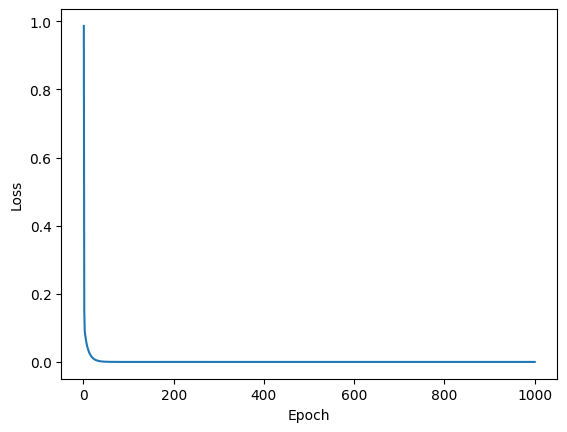

In [88]:
a = Dense(5, activation_function="reLu")

b = NetModel(input_shape=(2, ), usage="LinearRegression")
#b.add_layer(a)
#b.add_layer(Dense(2, activation_function="reLu"))
b.compile(activation_function="reLu")

X = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y = 2*X[:, 0] + 3*X[:, 1] + 1

b.train(X, y,"l2", nepochs= 1000, learning_rate=0.01)
b.display_losses()

X_p = np.vstack([np.random.random(100),np.random.random(100), np.ones(100)]).T
y_p = 2*X_p[:, 0] + 3*X_p[:, 1] + 1
h=b.predict_sample(X_p, y_p, "MSE")


Epoch 0:  Loss is 0.2698471001204068 
Epoch 1:  Loss is 0.2698459107944285 
Epoch 2:  Loss is 0.2698447038069045 
Epoch 3:  Loss is 0.26984347876977893 
Epoch 4:  Loss is 0.2698422352836756 
Epoch 5:  Loss is 0.26984097293748593 
Epoch 6:  Loss is 0.2698396913079372 
Epoch 7:  Loss is 0.26983838995914333 
Epoch 8:  Loss is 0.2698370684421351 
Epoch 9:  Loss is 0.2698357262943689 
Epoch 10:  Loss is 0.269834363039214 
Epoch 11:  Loss is 0.26983297818541585 
Epoch 12:  Loss is 0.2698315712265355 
Epoch 13:  Loss is 0.2698301416403627 
Epoch 14:  Loss is 0.2698286888883014 
Epoch 15:  Loss is 0.26982721241472785 
Epoch 16:  Loss is 0.2698257116463163 
Epoch 17:  Loss is 0.2698241859913345 
Epoch 18:  Loss is 0.26982263483890456 
Epoch 19:  Loss is 0.26982105755822805 
Epoch 20:  Loss is 0.2698194534977739 
Epoch 21:  Loss is 0.26981782198442555 
Epoch 22:  Loss is 0.2698161623225872 
Epoch 23:  Loss is 0.26981447379324414 
Epoch 24:  Loss is 0.26981275565297674 
Epoch 25:  Loss is 0.26981

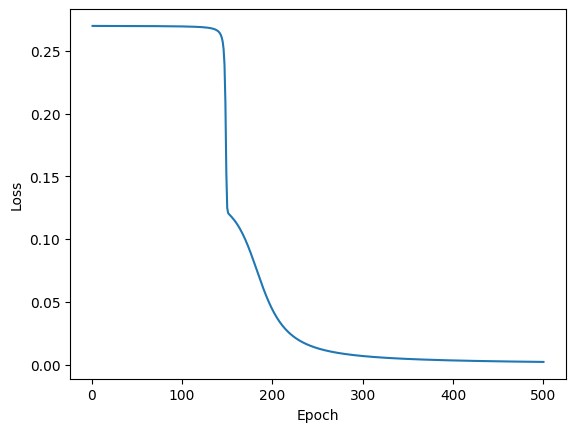

In [103]:
a = Dense(2, activation_function="reLu", categories=[-1, 1])

b = NetModel(input_shape=(2, ), usage="LogisticRegression")
b.add_layer(a)
b.compile()

X = train_set
Y = np.where(train_y==1,"Fleur ibis", "Fleur magnenta")

b.train(X, Y,"l2", nepochs= 500, learning_rate=0.01)
b.display_losses()
x = test_set
y = np.where(test_y==1,"Fleur ibis", "Fleur magnenta")
z=b.predict_sample(x, y)


In [107]:
print (z)
print("\n", y)
sum(z[i] == y[i] for i in range(len(y)))

['Fleur magnenta', 'Fleur ibis', 'Fleur magnenta', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur ibis', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur ibis', 'Fleur magnenta', 'Fleur magnenta', 'Fleur magnenta']

 ['Fleur magnenta' 'Fleur ibis' 'Fleur magnenta' 'Fleur ibis'
 'Fleur magnenta' 'Fleur magnenta' 'Fleur ibis' 'Fleur magnenta'
 'Fleur ibis' 'Fleur ibis' 'Fleur ibis' 'Fleur magnenta' 'F

49